In [1]:
import pandas  as pd
import numpy as np
from sklearn import  datasets
from sklearn import model_selection
from sklearn import tree

In [3]:
iris = datasets.load_iris()

print('Dataset structure=',dir(iris))

Dataset structure= ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [6]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x])

In [7]:
print('Unique target values=',df['target'].unique())
df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
66,5.6,3.0,4.5,1.5,1,versicolor
7,5.0,3.4,1.5,0.2,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
37,4.9,3.6,1.4,0.1,0,setosa
54,6.5,2.8,4.6,1.5,1,versicolor


In [8]:
df[df.target ==0].head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [9]:
df[df.target == 1].head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


In [10]:
df[df.target == 2].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica


In [14]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'sepal length (cm)', 'petal width (cm)']]
y = df[['target']]

print('X shape=',X.shape)
print('y shape=',y.shape)

X shape= (150, 4)
y shape= (150, 1)


In [19]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2,random_state= 1)
print('X_train dimension=', X_train.shape)
print('X_test dimension=', y_test.shape)
print('y_train dimension=', y_train.shape)
print('y_test dimension=', y_test.shape)

X_train dimension= (120, 4)
X_test dimension= (30, 1)
y_train dimension= (120, 1)
y_test dimension= (30, 1)


In [20]:
cls = tree.DecisionTreeClassifier(random_state=1)
cls.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [21]:
print('Actual value of species for 10th training example=',iris.target_names[y_test.iloc[10]][0])
print('Predicted value of species for 10th tarining example=',iris.target_names[cls.predict([X_test.iloc[10]])][0])

Actual value of species for 10th training example= versicolor
Predicted value of species for 10th tarining example= versicolor


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
print('\nActual value of species for 20th training example=',iris.target_names[y_test.iloc[20]][0])
print('Predicted value of species for 20th tarining example=',iris.target_names[cls.predict([X_test.iloc[20]])][0])


Actual value of species for 20th training example= versicolor
Predicted value of species for 20th tarining example= versicolor


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
print('\nActual value of species for 30th training example=',iris.target_names[y_test.iloc[29]][0])

print('Predicted value of species for 30th tarining example=',iris.target_names[cls.predict([X_test.iloc[29]])][0])


Actual value of species for 30th training example= virginica
Predicted value of species for 30th tarining example= virginica


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
cls.score(X_test, y_test)


0.9666666666666667

[Text(0.5, 0.95, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4, 0.85, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.85, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.4, 0.75, 'x[2] <= 7.1\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.3, 0.65, 'x[3] <= 1.35\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(0.2, 0.55, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.4, 0.55, 'x[1] <= 2.65\ngini = 0.291\nsamples = 17\nvalue = [0, 14, 3]'),
 Text(0.2, 0.45, 'x[0] <= 6.15\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.1, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.6, 0.45, 'x[1] <= 2.85\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]'),
 Text(0.5, 0.35, 'x[3] <= 1.45\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.6, 0.25, 'x[2] <= 

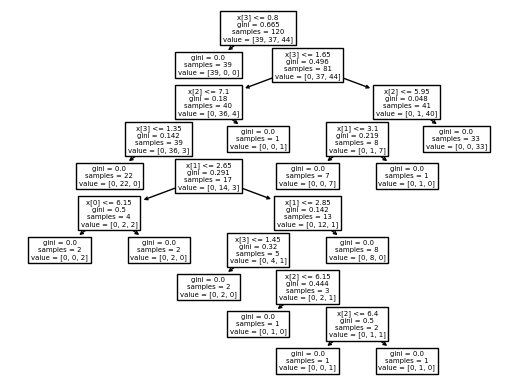

In [26]:
tree.plot_tree(cls)

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
sc.fit(X_train)

StandardScaler()

In [31]:
sepal_length_cm = float(input("Enter new sepal length (cm):"))
sepal_width_cm = float(input("Enter new sepal width (cm):"))
petal_length_cm = float(input("Enter new petal length (cm):"))
petal_width_cm = float(input("Enter new sepal width (cm):"))

new_flower = [[sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm]]
transformed_new_flower = sc.transform(new_flower)
result = cls.predict(transformed_new_flower)

if result == 0:
    print("the new flower species may be Setosa")
elif result == 1:
    print("the new flower species may be Versicolor")
else:
    print("the new flower species may be Virginica")

Enter new sepal length (cm):2
Enter new sepal width (cm):3
Enter new petal length (cm):4
Enter new sepal width (cm):2
the new flower species may be Versicolor


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


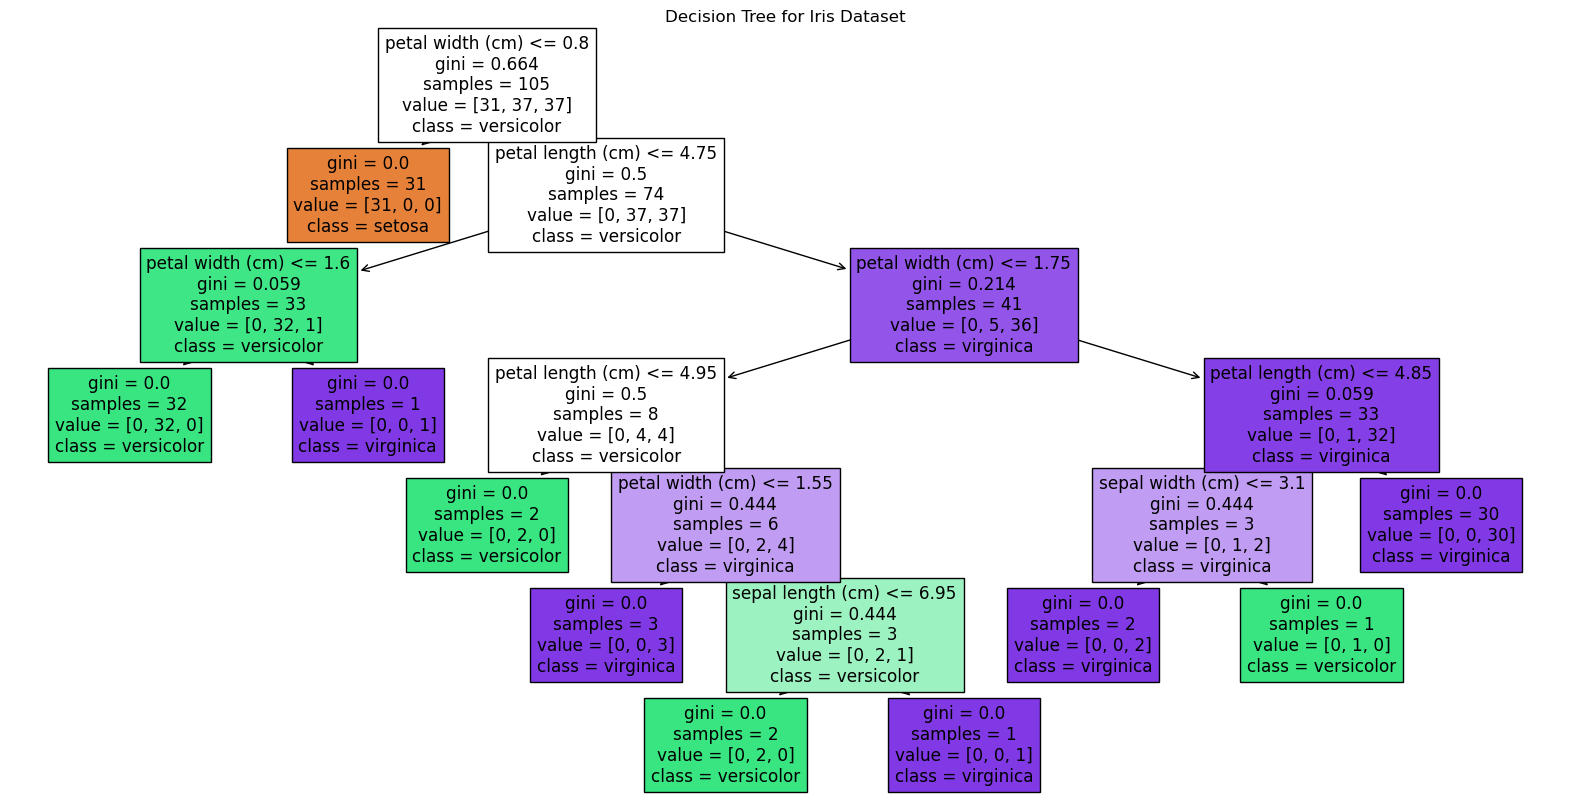

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=iris.feature_names,class_names=iris.target_names, filled=True)
plt.title('Decision Tree for Iris Dataset')
plt.show()

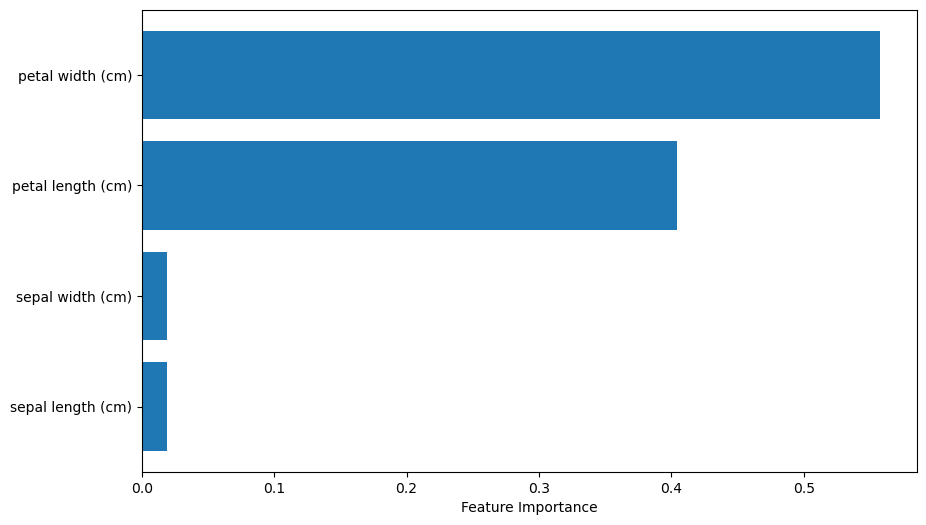

In [43]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [iris.feature_names[i] for i in  indices])
plt.xlabel('Feature Importance')
plt.show()

In [ ]:
import numpy as np

X = iris.data[:,:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

x_min, y_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k',cmap=plt.cm.Paired)